In [ ]:
!sudo apt-get update
!sudo apt-get -y upgrade
!sudo apt-get install python-opencv -y --allow-unauthenticated
!sudo apt-get install libgtk2.0-dev -y

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease                    
Hit:3 http://packages.cloud.google.com/apt cloud-sdk-buster InRelease          
Hit:4 http://security.debian.org/debian-security buster/updates InRelease      
Hit:5 http://deb.debian.org/debian buster-backports InRelease                  
Get:7 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-buster InRelease [5553 B]
Hit:8 https://packages.cloud.google.com/apt google-fast-socket InRelease       
Hit:9 https://nvidia.github.io/libnvidia-container/stable/debian10/amd64  InRelease
Hit:10 https://download.docker.com/linux/debian buster InRelease    
Hit:11 https://nvidia.github.io/nvidia-container-runtime/stable/debian10/amd64  InRelease
Get:12 http://packages.cloud.google.com/apt gcsfuse-buster InRelease [5394 B]
Hit:13 https://nvidia.github.io/nvidia-docker/debian10/amd64  InRelease        
Get:6 https://packages.cloud.google.com/

In [1]:
import cv2

<class 'google.cloud.storage.blob.Blob'>
<class 'numpy.ndarray'>
(527330,)


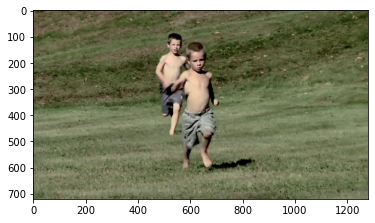

In [3]:
from google.cloud import storage
import numpy as np
import matplotlib.pyplot as plt
storage_client = storage.Client("pose_estimation")
bucket = storage_client.get_bucket('pose_estimation_datasets')
# img_name = data[i]['image']
blob = bucket.blob('MPII/images/' +  '000001163.jpg')
blob.content_type = 'image/jpeg'
print(type(blob))
image = np.asarray(bytearray(blob.download_as_string()))
print(type(image))
print(image.shape)
cv2_image = cv2.imdecode(image, cv2.IMREAD_UNCHANGED)
plt.imshow(cv2_image[...,::-1])
cv2.waitKey(0)
plt.show()

In [ ]:
%run -i 'test_mpii.py'

2958


In [10]:
%run -i 'train_mpii.py'

22246
Exited Loop


In [14]:
filename = 'test_images'
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()

(720, 960, 3)


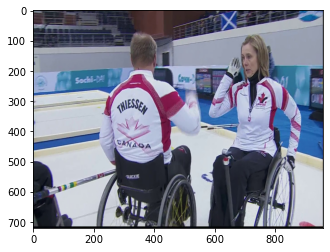

In [18]:
print(new_dict[0].shape)
plt.imshow(new_dict[0][...,::-1])

(612, 510)
(681, 438)
(720, 960, 3)


-1

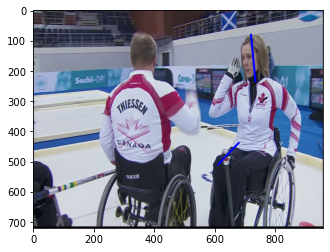

In [20]:
filename = 'test_joint_labels'
infile = open(filename,'rb')
kpt_in = pickle.load(infile)
infile.close()

img1 = new_dict[0]
j1 = tuple(kpt_in[0][1])
j2 = tuple(kpt_in[0][2])

print(j1)
print(j2)

print(img.shape)

img1 = cv2.line(img1,j1, j2,(255,0,0),5)
plt.imshow(img1[...,::-1])
cv2.waitKey(0)